# PREDICTIONS

## Loading Data

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
from utils import COLS_TO_EXCLUDE

df = pd.read_csv('../Datasets/final_tennis_dataset_symmetric.csv')

## DECISION TREE

In [31]:
# 2. Sélection des features et de la target
#    Ici, on prend toutes les colonnes sauf 'target' et, si besoin, on exclut des colonnes inutiles.
#    À adapter selon les champs exacts dans ton CSV.

X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# 3. Option : conversion en numérique si nécessaire (certaines colonnes peuvent être déjà numériques).
#    Si certaines colonnes sont catégorielles, on peut faire un pd.get_dummies ou un OrdinalEncoder.

# Exemple (facultatif):
# X = pd.get_dummies(X, drop_first=True)

# 4. Séparation train/test
#    À noter : pour une prédiction réellement future, il est préférable d’effectuer un split temporel.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Création et entraînement du Decision Tree
#    Ajuste les hyperparamètres (max_depth, min_samples_split, etc.) selon tes besoins.
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=50,
    random_state=42
)
clf.fit(X_train, y_train)

# 6. Prédictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # Utile pour certaines métriques comme log_loss

# 7. Évaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print("Accuracy :", acc)
print("F1 Score :", f1)
print("Log Loss :", ll)
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

# 8. Importance des features (utile pour comprendre les variables clés)
importances = clf.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

print("\nTop 20 Feature Importances:")
for idx in sorted_idx[:20]:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


Accuracy : 0.6666286236019173
F1 Score : 0.6767494190121361
Log Loss : 0.605779445415226

Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.64      0.66     13143
           1       0.66      0.70      0.68     13143

    accuracy                           0.67     26286
   macro avg       0.67      0.67      0.67     26286
weighted avg       0.67      0.67      0.67     26286

Confusion Matrix :
 [[8350 4793]
 [3970 9173]]

Top 20 Feature Importances:
ELO_DIFF: 0.8373
ELO_SURFACE_DIFF: 0.0482
PLAYER2_SURFACE_MATCHES: 0.0311
PLAYER1_SURFACE_MATCHES: 0.0303
AGE_DIFF: 0.0135
RANK_RATIO: 0.0119
PLAYER2_ELO_SURFACE_BEFORE: 0.0063
BEST_OF: 0.0051
ATP_RANK_DIFF: 0.0033
PLAYER2_P_2NDWON_LAST_100: 0.0024
PLAYER1_ELO_SURFACE_BEFORE: 0.0022
PLAYER1_RANK_POINTS: 0.0019
PLAYER2_P_ACE_LAST_20: 0.0013
PLAYER2_AGE: 0.0008
PLAYER1_P_1STIN_LAST_2000: 0.0007
PLAYER2_P_2NDWON_LAST_3: 0.0007
PLAYER2_P_DF_LAST_50: 0.0006
DRAW_SIZE: 0.0005
PLAYER2

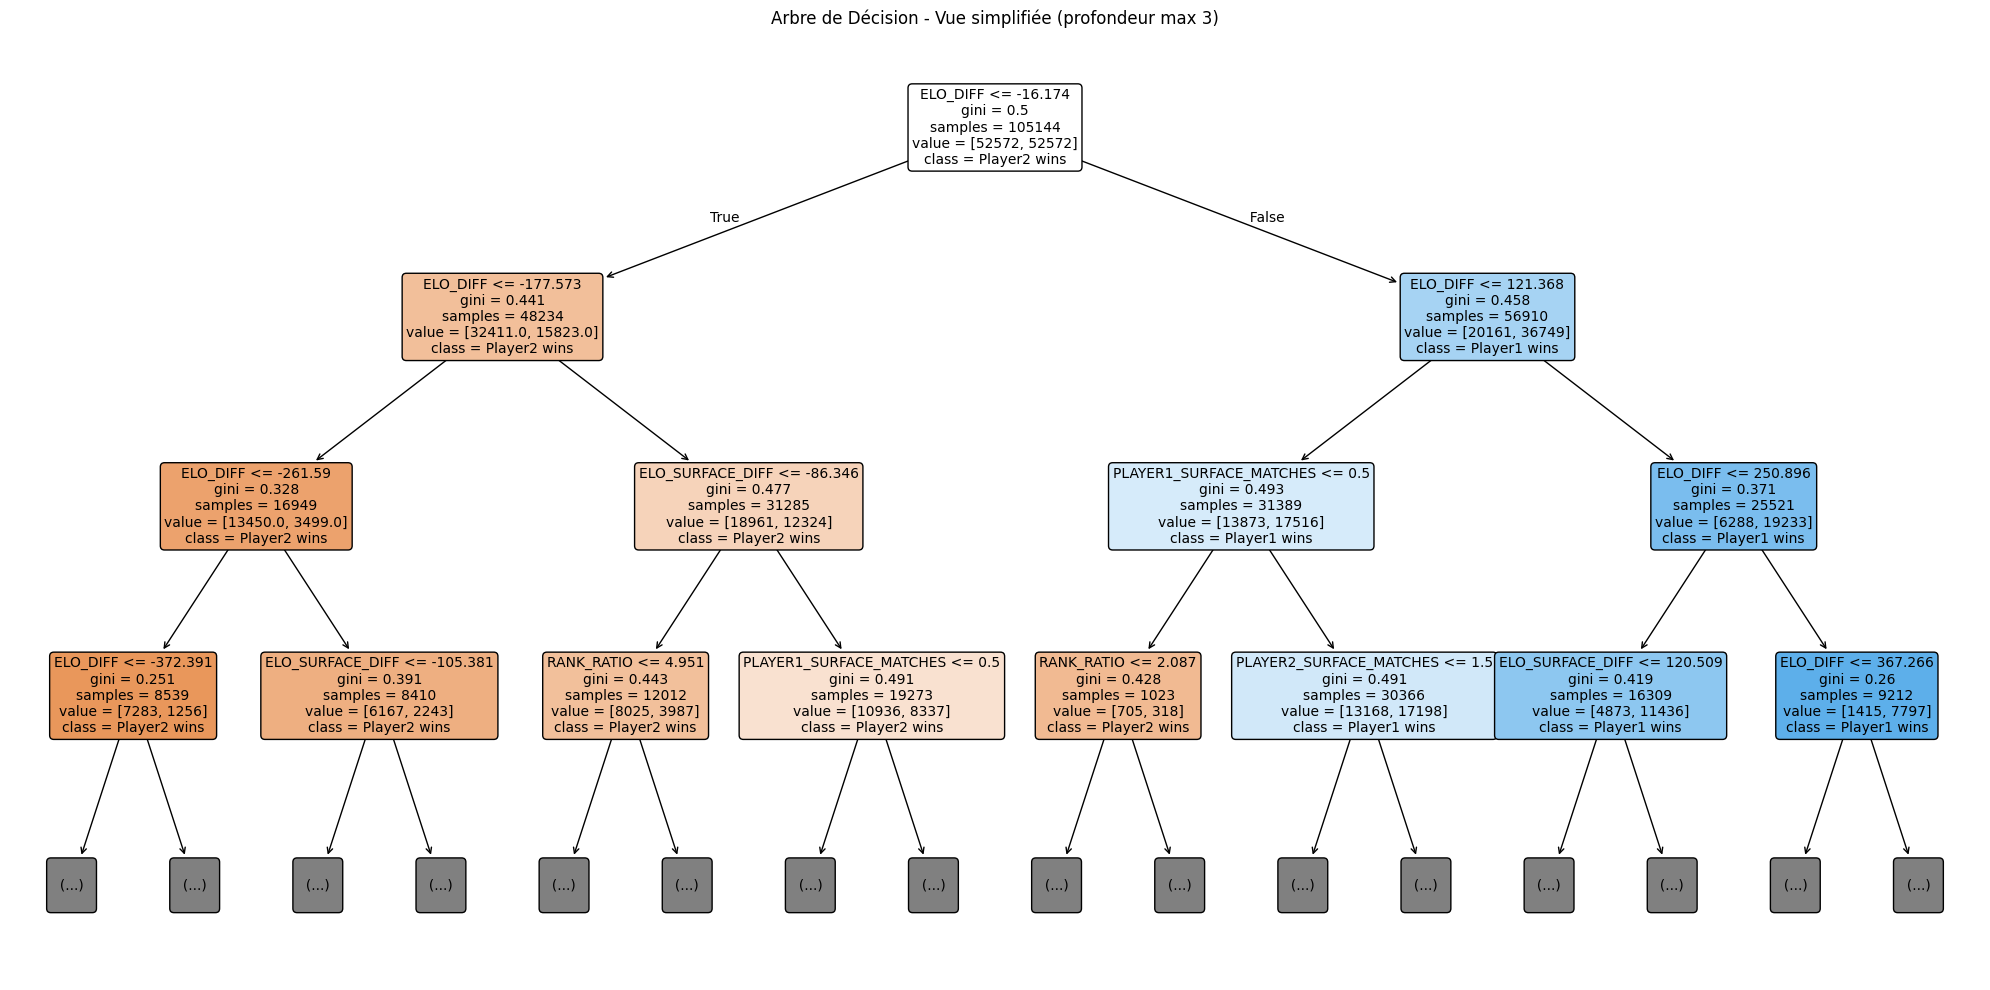

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Taille du plot adaptée à la profondeur
plt.figure(figsize=(20, 10))

# Affichage de l’arbre
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Player2 wins", "Player1 wins"],
    filled=True,
    rounded=True,
    max_depth=3,  # Tu peux changer cette valeur pour afficher plus ou moins de profondeur
    fontsize=10
)

plt.title("Arbre de Décision - Vue simplifiée (profondeur max 3)")
plt.tight_layout()
plt.show()

## RANDOM FOREST

Entraînement de la Random Forest...

Résultats sur le jeu de test :
Accuracy : 0.6446939514668598
F1 Score : 0.6461038961038961
Log Loss : 0.6160289351526297

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.64      2761
           1       0.64      0.65      0.65      2761

    accuracy                           0.64      5522
   macro avg       0.64      0.64      0.64      5522
weighted avg       0.64      0.64      0.64      5522

Confusion Matrix:
 [[1769  992]
 [ 970 1791]]


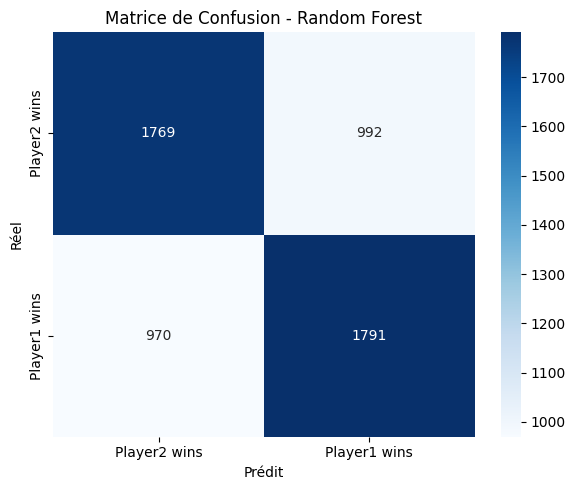

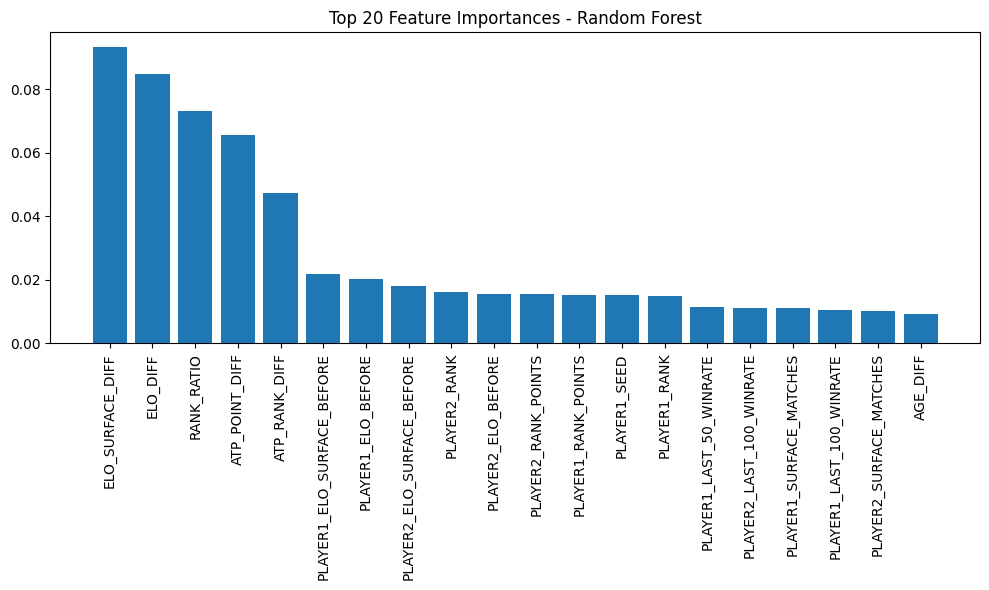

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement du dataset
df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")

# 2. Préparation des données
X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# 3. Séparation en train/test
df_dates = pd.to_datetime(df['TOURNEY_DATE'].astype(str), format='%Y%m%d')
train_idx = df_dates.dt.year <= 2022
val_idx   = df_dates.dt.year == 2023
test_idx  = df_dates.dt.year == 2024

X_train, y_train = X[train_idx], y[train_idx]
X_val,   y_val   = X[val_idx],   y[val_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]
# 4. Création et entraînement de la Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=30,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # utile si léger déséquilibre
)

print("Entraînement de la Random Forest...")
rf.fit(X_train, y_train)

# 5. Prédictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# 6. Évaluation
print("\nRésultats sur le jeu de test :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Affichage graphique de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 8. Affichage des 20 features les plus importantes
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

## Random forest with CV

In [34]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [8, 12, 16],
#     'min_samples_split': [10, 30, 50],
# }

# rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

# grid_search = GridSearchCV(
#     rf,
#     param_grid,
#     cv=3,
#     scoring='f1',
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(X, y)

# print("Meilleurs paramètres :", grid_search.best_params_)
# print("Meilleur score f1 :", grid_search.best_score_)

## XGBoost

Entraînement du modèle XGBoost...


/home/cytech/miniconda3/envs/TFM_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:54:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Résultats sur le jeu de test :
Accuracy : 0.6824925816023739
F1 Score : 0.6838875842739186
Log Loss : 0.5860500477994836

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68     13143
           1       0.68      0.69      0.68     13143

    accuracy                           0.68     26286
   macro avg       0.68      0.68      0.68     26286
weighted avg       0.68      0.68      0.68     26286

Confusion Matrix:
 [[8912 4231]
 [4115 9028]]


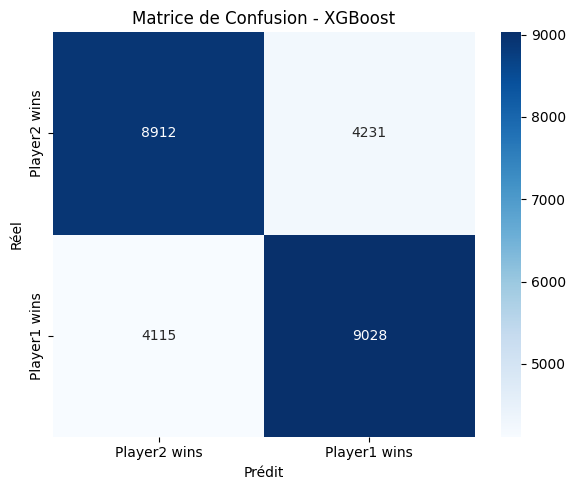

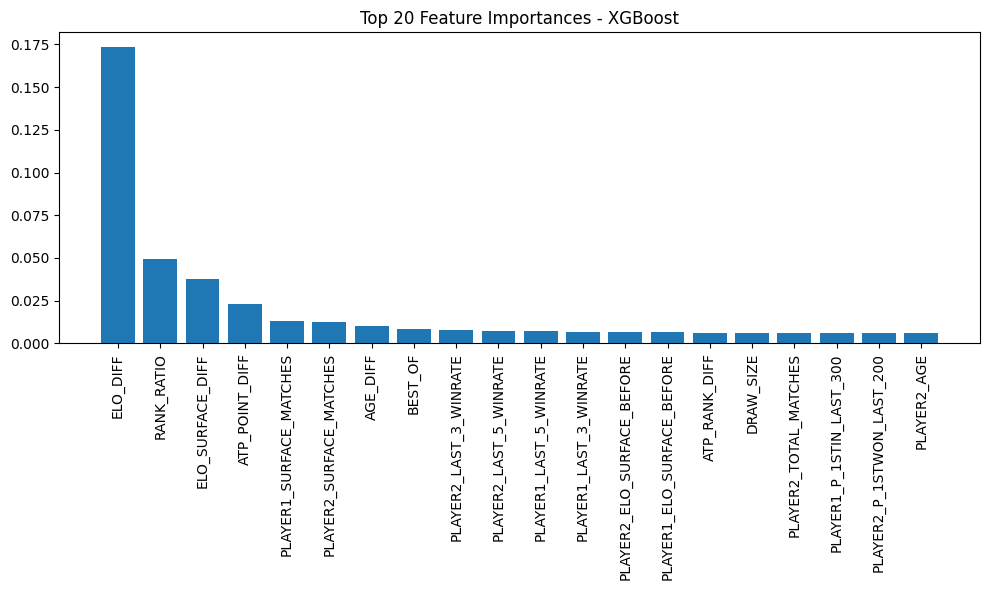

In [35]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement du dataset
df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")

# 2. Préparation des données
X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Entraînement XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Entraînement du modèle XGBoost...")
xgb_model.fit(X_train, y_train)

# 5. Prédictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

# 6. Évaluation
print("\nRésultats sur le jeu de test :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Matrice de Confusion - XGBoost")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 8. Importance des variables
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - XGBoost")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

/home/cytech/miniconda3/envs/TFM_env/lib/python3.12/site-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Accuracy       : 0.664070988772184
F1 Score       : 0.6635225829856702
Log Loss       : 0.6037518214754276
Brier Score    : 0.20872323409247695
ROC AUC        : 0.7333583580793221


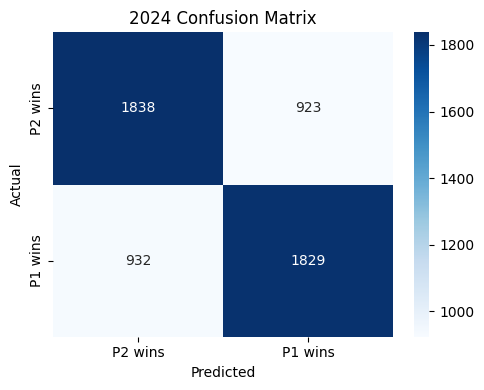

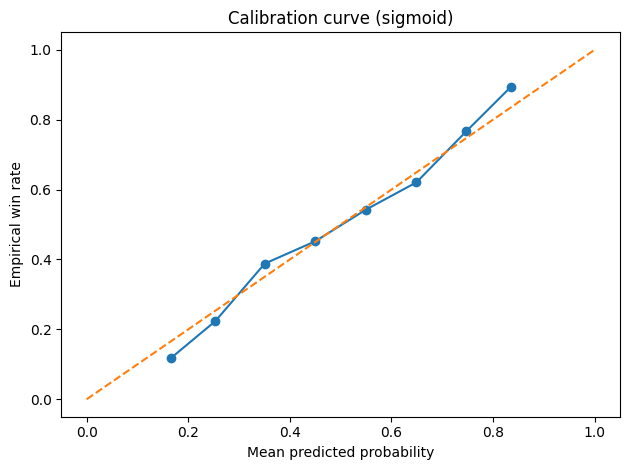

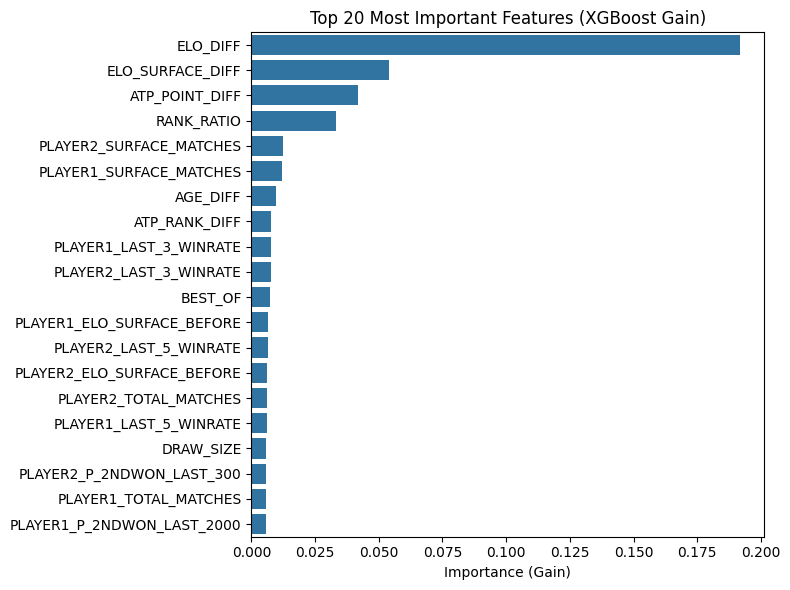

In [36]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, f1_score, log_loss,
    brier_score_loss, roc_auc_score
)
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost.sklearn import XGBClassifier

# --------------------
# 1. Load & filter
# --------------------

# df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")
df = pd.read_parquet("../Datasets/final_tennis_dataset_symmetric.parquet", engine="pyarrow")

X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
X = X.select_dtypes(include=[np.number])
y = df['TARGET']

# --------------------
# 2. Chronological split: train ≤2022, val 2023, test 2024
# --------------------
df_dates = pd.to_datetime(df['TOURNEY_DATE'].astype(str), format='%Y%m%d')
train_idx = df_dates.dt.year <= 2022
val_idx   = df_dates.dt.year == 2023
test_idx  = df_dates.dt.year == 2024

X_train, y_train = X[train_idx], y[train_idx]
X_val,   y_val   = X[val_idx],   y[val_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

# --------------------
# 3. Model training (no early stopping)
# --------------------
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "n_estimators": 300,
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist",  # use 'gpu_hist' if GPU available
}

xgb_clf = XGBClassifier(**params)

# Fit on full train+val (or just train if you prefer strict holdout)
xgb_clf.fit(X_train, y_train, verbose=True)

# --------------------
# 4. Optional probability calibration (sigmoid = Platt scaling)
# --------------------
calib = CalibratedClassifierCV(xgb_clf, method='sigmoid', cv='prefit')
calib.fit(X_val, y_val)  # fits only the calibration layer

model = calib  # Use calibrated model for predictions

# --------------------
# 5. Evaluation on 2024 test set
# --------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy       :", accuracy_score(y_test, y_pred))
print("F1 Score       :", f1_score(y_test, y_pred))
print("Log Loss       :", log_loss(y_test, y_prob))
print("Brier Score    :", brier_score_loss(y_test, y_prob))
print("ROC AUC        :", roc_auc_score(y_test, y_prob))

# --------------------
# 6. Confusion matrix
# --------------------
plt.figure(figsize=(5, 4))
sns.heatmap(
    pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
    xticklabels=["P2 wins", "P1 wins"], yticklabels=["P2 wins", "P1 wins"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("2024 Confusion Matrix")
plt.tight_layout()
plt.show()

# --------------------
# 7. Calibration curve
# --------------------
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.figure()
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], '--')
plt.title("Calibration curve (sigmoid)")
plt.xlabel("Mean predicted probability")
plt.ylabel("Empirical win rate")
plt.tight_layout()
plt.show()

# --------------------
# 8. Top 20 Feature Importances (Gain-based)
# --------------------
importances = xgb_clf.feature_importances_
feature_names = X_train.columns

# Create DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp_df, y='Feature', x='Importance')
plt.title("Top 20 Most Important Features (XGBoost Gain)")
plt.xlabel("Importance (Gain)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [37]:
xgb_model.save_model("../models/xgb_model.json")

### With only ELO_DIFF

Accuracy       : 0.6363636363636364
F1 Score       : 0.6343772760378733
Log Loss       : 0.6295303087916627
Brier Score    : 0.2202626501920288
ROC AUC        : 0.6957030460358691


/home/cytech/miniconda3/envs/TFM_env/lib/python3.12/site-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


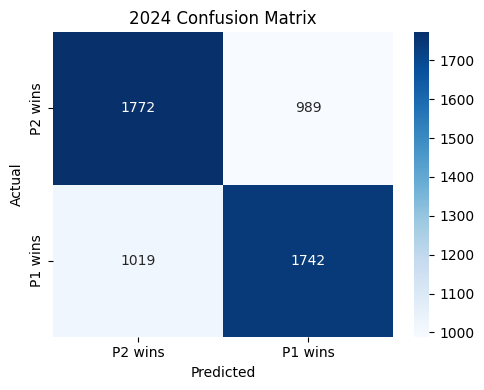

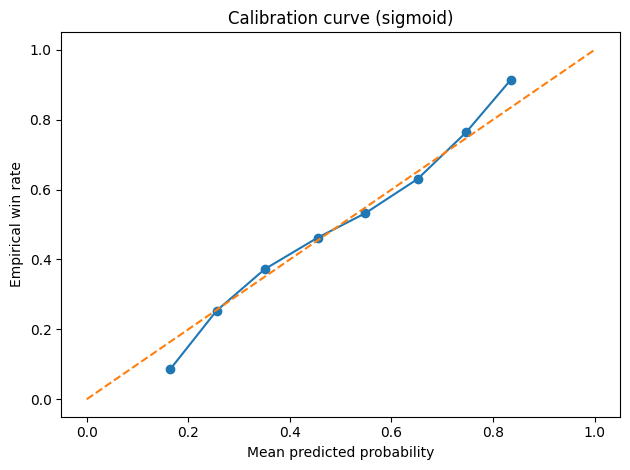

In [38]:
# train_xgb_timeseries.py

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.metrics import (
    accuracy_score, f1_score, log_loss,
    brier_score_loss, roc_auc_score
)
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost.sklearn import XGBClassifier

# --------------------
# 1. Load & filter
# --------------------

# df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")
df = pd.read_parquet("../Datasets/final_tennis_dataset_symmetric.parquet", engine="pyarrow")


# 2. Préparation des données

# X = df.drop(columns=COLS_TO_EXCLUDE, errors='ignore')
# y = df['TARGET']
# Test avec uniquement la feature ELO_DIFF
X = df[['ELO_DIFF']].copy()
y = df['TARGET']

# --------------------
# 2. Chronological split: train ≤2022, val 2023, test 2024
# --------------------
df_dates = pd.to_datetime(df['TOURNEY_DATE'].astype(str), format='%Y%m%d')
train_idx = df_dates.dt.year <= 2022
val_idx   = df_dates.dt.year == 2023
test_idx  = df_dates.dt.year == 2024

X_train, y_train = X[train_idx], y[train_idx]
X_val,   y_val   = X[val_idx],   y[val_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

# --------------------
# 3. Model training (no early stopping)
# --------------------
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "n_estimators": 300,
    "learning_rate": 0.03,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist",  # use 'gpu_hist' if GPU available
}

xgb_clf = XGBClassifier(**params)

# Fit on full train+val (or just train if you prefer strict holdout)
xgb_clf.fit(X_train, y_train, verbose=True)

# --------------------
# 4. Optional probability calibration (sigmoid = Platt scaling)
# --------------------
calib = CalibratedClassifierCV(xgb_clf, method='sigmoid', cv='prefit')
calib.fit(X_val, y_val)  # fits only the calibration layer

model = calib  # Use calibrated model for predictions

# --------------------
# 5. Evaluation on 2024 test set
# --------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy       :", accuracy_score(y_test, y_pred))
print("F1 Score       :", f1_score(y_test, y_pred))
print("Log Loss       :", log_loss(y_test, y_prob))
print("Brier Score    :", brier_score_loss(y_test, y_prob))
print("ROC AUC        :", roc_auc_score(y_test, y_prob))

# --------------------
# 6. Confusion matrix
# --------------------
plt.figure(figsize=(5, 4))
sns.heatmap(
    pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
    xticklabels=["P2 wins", "P1 wins"], yticklabels=["P2 wins", "P1 wins"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("2024 Confusion Matrix")
plt.tight_layout()
plt.show()

# --------------------
# 7. Calibration curve
# --------------------
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.figure()
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], '--')
plt.title("Calibration curve (sigmoid)")
plt.xlabel("Mean predicted probability")
plt.ylabel("Empirical win rate")
plt.tight_layout()
plt.show()

# --------------------
# 8. Top 20 Feature Importances (Gain-based)
# --------------------
importances = xgb_clf.feature_importances_
feature_names = X_train.columns

# Create DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

# Plot
# plt.figure(figsize=(8, 6))
# sns.barplot(data=feat_imp_df, y='Feature', x='Importance')
# plt.title("Top 20 Most Important Features (XGBoost Gain)")
# plt.xlabel("Importance (Gain)")
# plt.ylabel("")
# plt.tight_layout()
# plt.show()